In [1]:
# import necessary libraries
import numpy as np
import pandas as pd

In [2]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
churn = pd.read_csv('..\\data\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# get info about dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(churn['Churn'].value_counts())
print(churn['Churn'].value_counts(normalize=True))

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


<Axes: >

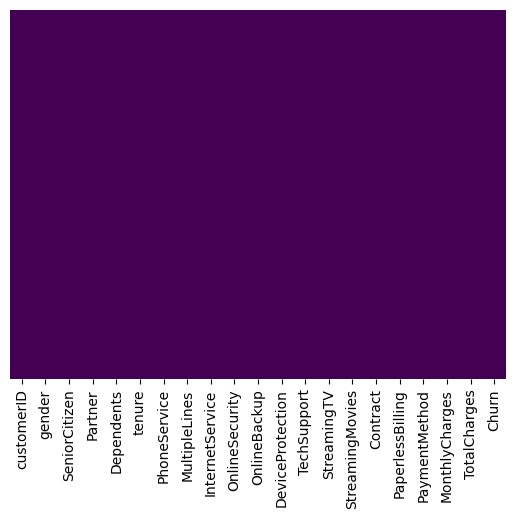

In [7]:
sns.heatmap(churn.isnull(),cbar=False,yticklabels=False,cmap='viridis')
# No null values

In [8]:
# data cleaning and preprocessing
churn['TotalCharges']=pd.to_numeric(churn['TotalCharges'],errors='coerce')
churn['TotalCharges']=churn['TotalCharges'].fillna(churn['TotalCharges'].median())

In [9]:
churn.drop('customerID',axis=1,inplace=True)

In [10]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# replace 'No phone service' and 'No internet service' with 'No'
replace_dict = {'No phone service': 'No', 'No internet service': 'No'}
cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols:
    churn[col] = churn[col].replace(replace_dict)

In [12]:
churn=pd.get_dummies(churn,
                     columns=['gender','Partner','Dependents','PhoneService',
                              'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                              'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                              'Contract','PaperlessBilling','PaymentMethod','Churn'],
                     drop_first=True,dtype=int)

In [13]:
# check again na values
churn.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Churn_Yes  

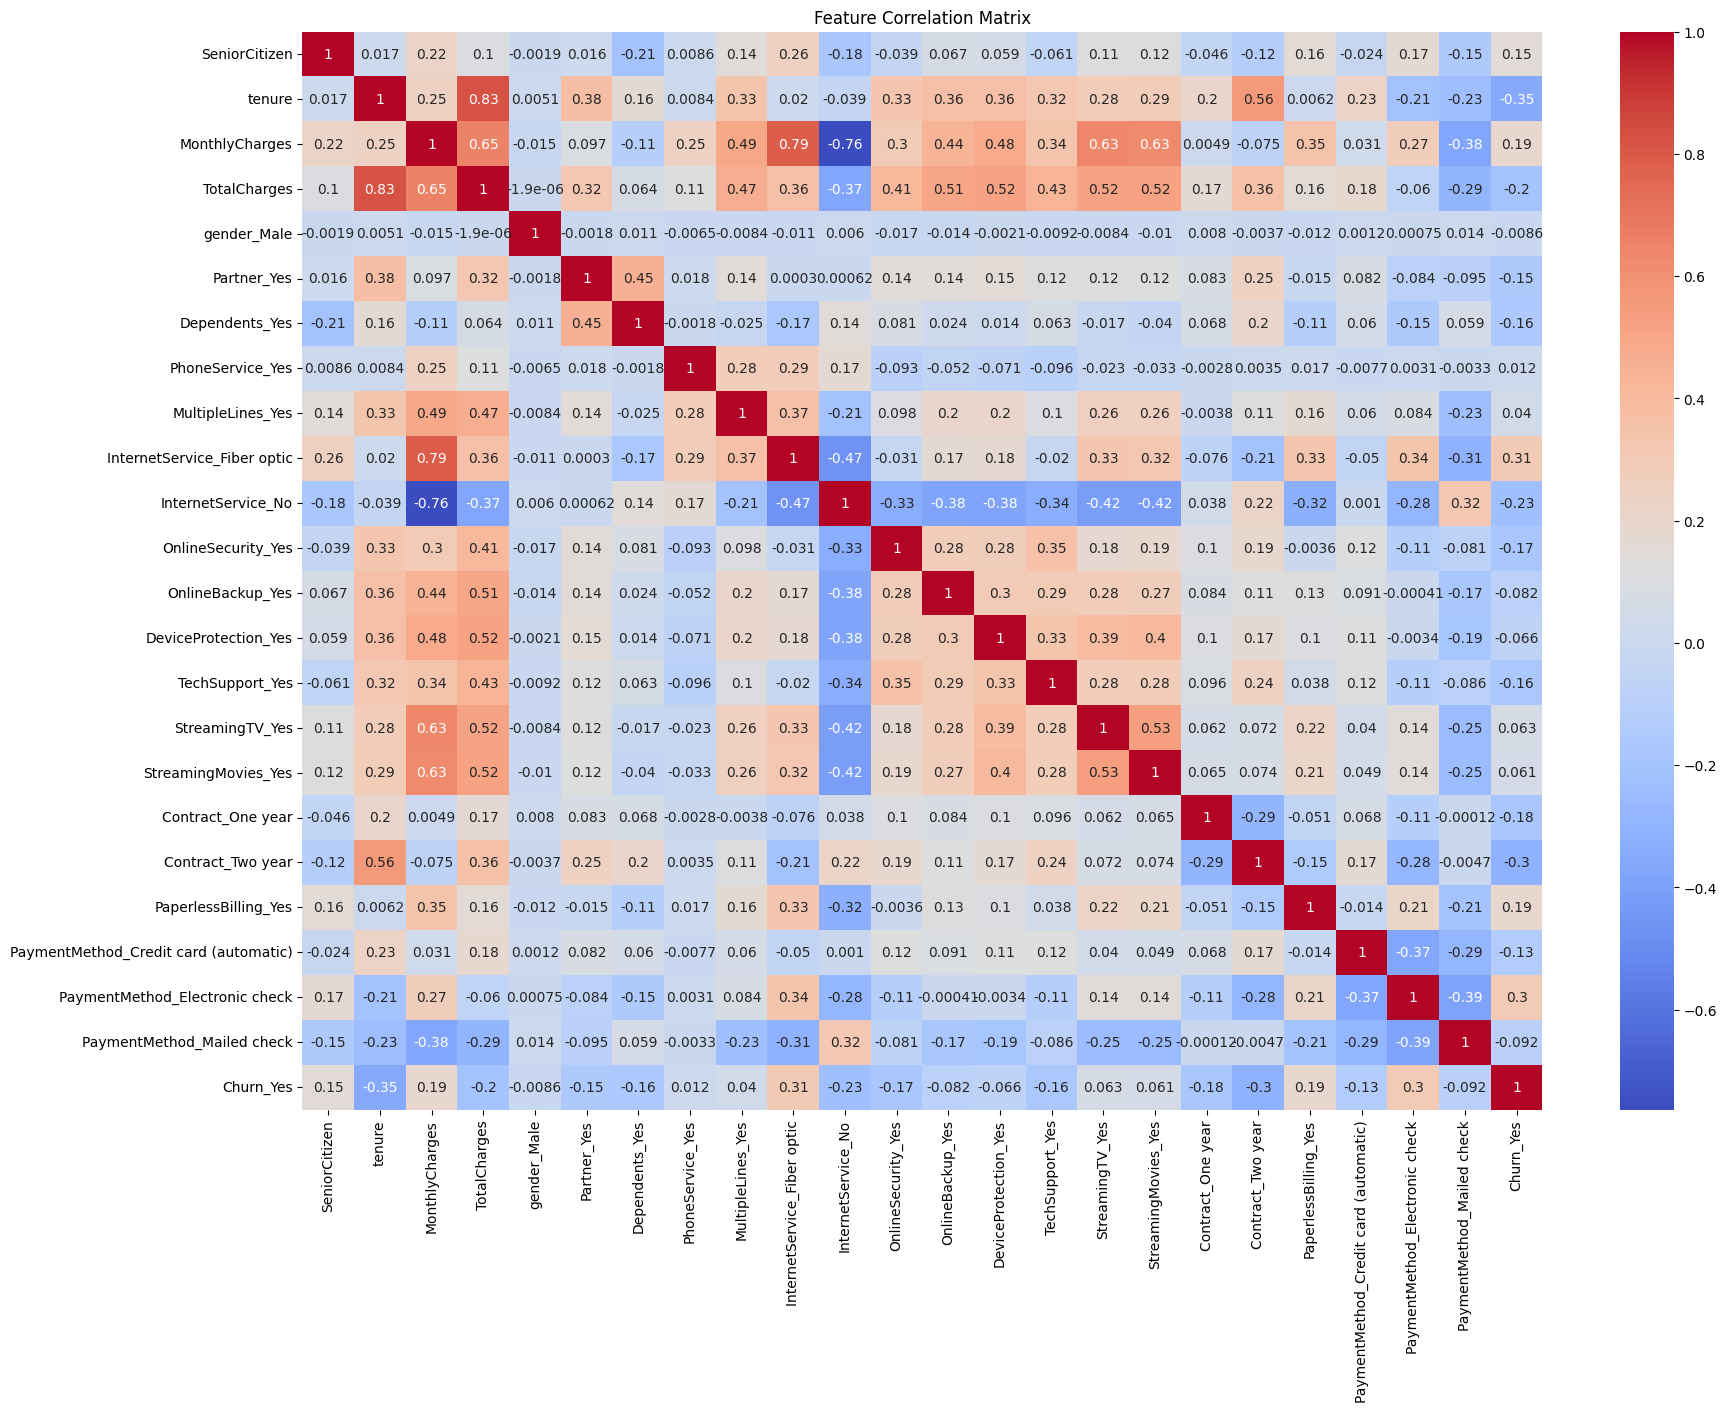

In [14]:
# correlation matrix
plt.figure(figsize=(20,14))
sns.heatmap(churn.corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# correlation between tenure and total charges is high

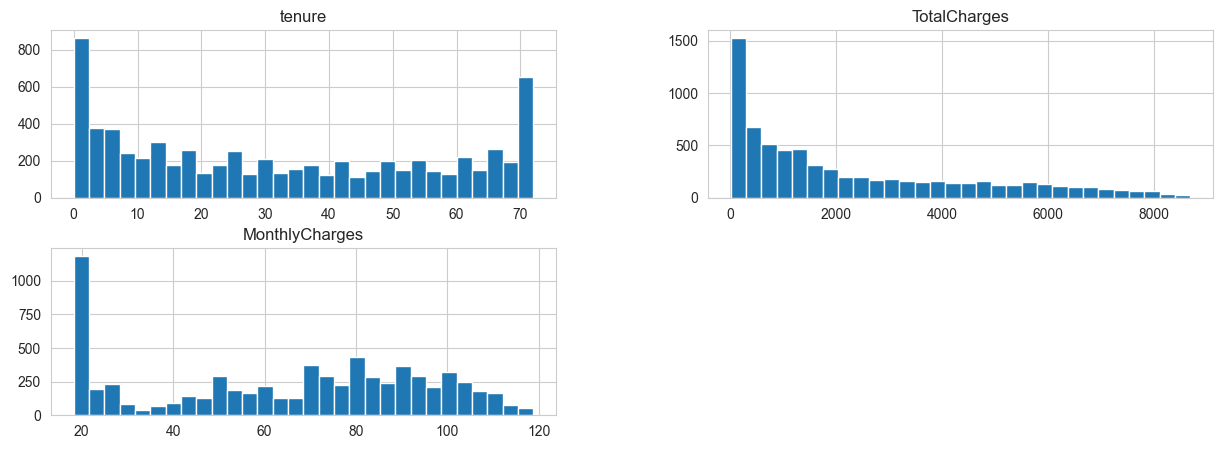

In [15]:
sns.set_style('whitegrid')
churn[['tenure','TotalCharges','MonthlyCharges']].hist(bins=30,figsize=(15,5))
plt.show()

In [16]:
# import ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [17]:
# train test split
x = churn.drop('Churn_Yes',axis=1)
y = churn['Churn_Yes']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
# logistic regression model
logmodel=LogisticRegression(class_weight='balanced')
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
logmodel.fit(x_train_scaled,y_train)
y_prob=logmodel.predict_proba(x_test_scaled)[:,1]
y_pred=(y_prob>0.4).astype(int)

# metrics
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f'ROC-AUC score:{roc_auc_score(y_test,y_prob)}')

              precision    recall  f1-score   support

           0       0.94      0.63      0.76      1036
           1       0.46      0.88      0.61       373

    accuracy                           0.70      1409
   macro avg       0.70      0.76      0.68      1409
weighted avg       0.81      0.70      0.72      1409

[[656 380]
 [ 44 329]]
ROC-AUC score:0.8619600546544246


In [19]:
# decision tree model
dtree=DecisionTreeClassifier(class_weight='balanced')
dtree.fit(x_train,y_train)
y_prob=dtree.predict_proba(x_test)[:,1]
y_pred=(y_prob>0.4).astype(int)

# metrics
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1036
           1       0.51      0.49      0.50       373

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409

[[857 179]
 [190 183]]
ROC-AUC: 0.6591616031964558


In [20]:
# random forest model
rfmodel=RandomForestClassifier(class_weight='balanced',n_estimators=200)
rfmodel.fit(x_train,y_train)
y_prob=rfmodel.predict_proba(x_test)[:,1]
y_pred=(y_prob>0.4).astype(int)

# metrics
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1036
           1       0.61      0.61      0.61       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

[[888 148]
 [146 227]]
ROC-AUC: 0.8416522612233068


In [21]:
# Logistic Regression gives the best results here
# Logistic Regression achieved the highest ROC-AUC (0.86) and recall (0.88),
# making it the most suitable model when the business objective is to identify maximum churn customers.

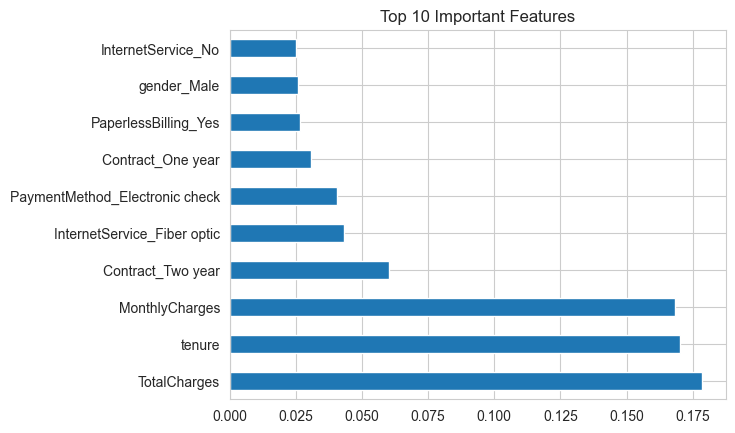

In [22]:
# most important features from random forest
importances = rfmodel.feature_importances_
features = x.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()